In [1]:
import pandas as pd
import numpy as np

In [ ]:
# df_train=pd.read_csv('sign_mnist_train.csv')
# df_test=pd.read_csv('sign_mnist_test.csv')
# y_train=df_train['label'].values
# y_test=df_test['label'].values
# df_train.drop('label',axis=1,inplace=True)
# df_test.drop('label',axis=1,inplace=True)
# df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
# x_train=df_train.values
# x_test=df_test.values
# unique_val = np.array(y_train)
# np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [ ]:
# x_train=np.array(x_train.reshape(-1,28,28,1))
# x_test=np.array(x_test.reshape(-1,28,28,1))

In [ ]:
# print(x_train.shape)
# print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# from sklearn.preprocessing import LabelBinarizer
# lb_train= LabelBinarizer()
# lb_test=LabelBinarizer()
# y_train=lb_train.fit_transform(y_train)
# y_test=lb_test.fit_transform(y_test)

In [ ]:
# print(y_train)
# print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [12]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[10].reshape(28,28),cmap='gray')

In [ ]:
# x_train=x_train/255
# x_test=x_test/255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = r'cnn_basic_dataset\train'
valid_path = r'cnn_basic_dataset\test'

img_size = (64, 64)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val = val_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 120 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [7]:
batch_size = 128
num_classes = 6
epochs = 100


In [8]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64, 3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

c:\Program Files\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [10]:
history = model.fit(train, validation_data=val, epochs=100)

Epoch 1/100


c:\Program Files\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.1542 - loss: 1.7994 - val_accuracy: 0.1667 - val_loss: 1.7704
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1535 - loss: 1.7787 - val_accuracy: 0.1667 - val_loss: 1.7625
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1961 - loss: 1.7531 - val_accuracy: 0.1667 - val_loss: 1.7356
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2010 - loss: 1.7432 - val_accuracy: 0.3667 - val_loss: 1.7030
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2379 - loss: 1.7008 - val_accuracy: 0.4333 - val_loss: 1.6330
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3378 - loss: 1.6016 - val_accuracy: 0.5000 - val_loss: 1.5162
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3727 - loss: 1.5676 - val_accuracy: 0.4667 - val_loss: 1.3312
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4072 - loss: 1.4979 - val_accuracy: 0.6000 - val_loss: 1.2319
Epo

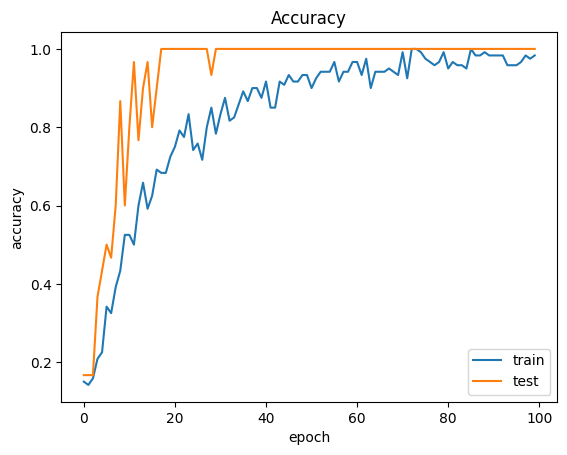

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [14]:
model.save('CNN_basic.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


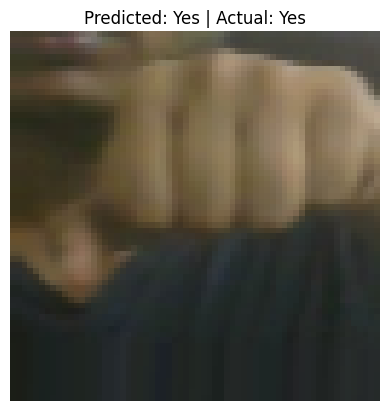

Random index: 12
Probabilities: [[8.2453433e-04 1.9067405e-04 9.5304530e-03 1.6968171e-04 2.2189013e-06
  9.8928237e-01]]
Max index: 5
Predicted letter: Yes
Actual label index: 5
Actual letter: Yes


In [ ]:
import cv2
import random
from tensorflow.keras.utils import img_to_array

alphabet=['Hello', 'IloveYou', 'No','Please', 'Thank', 'Yes']

def classify(image):
    if image.max() > 1:
        image = image.astype("float") / 255.0

    image = cv2.resize(image, (64, 64))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba = model.predict(image)
    idx = np.argmax(proba)
    return idx, proba

images, labels = next(train)

rand_index = random.randint(0, len(images) - 1)

img = images[rand_index]
label = labels[rand_index]

idx, proba = classify(img)
true_idx = np.argmax(label)
true_letter = alphabet[true_idx]

plt.imshow(img)
plt.title(f"Predicted: {alphabet[idx]} | Actual: {true_letter}")
plt.axis('off')
plt.show()

print(f"Random index: {rand_index}")
print("Probabilities:", proba)
print("Max index:", idx)
print("Predicted letter:", alphabet[idx])
print("Actual label index:", true_idx)
print("Actual letter:", true_letter)

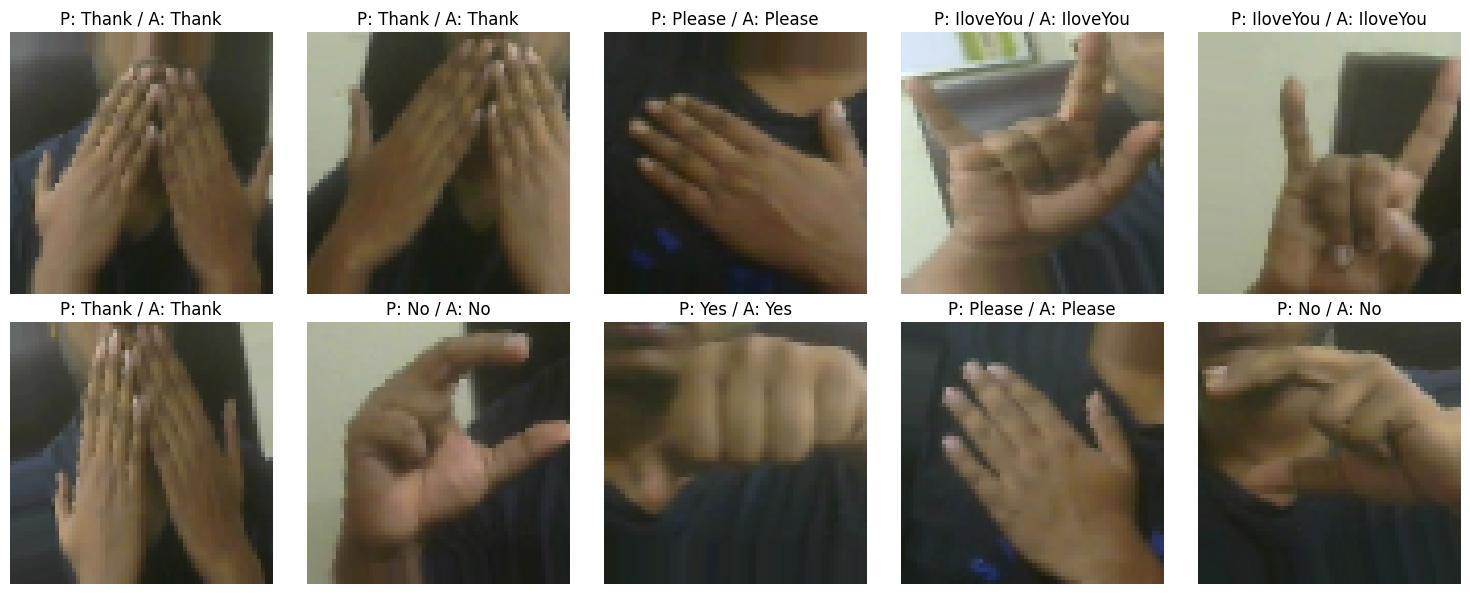

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
from tensorflow.keras.utils import img_to_array

def classify(image):
    if image.max() > 1:
        image = image.astype("float") / 255.0
    image = cv2.resize(image, (64, 64))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba = model.predict(image, verbose=0)
    idx = np.argmax(proba)
    return idx, proba

sample_indices = random.sample(range(len(images)), 10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for ax, idx in zip(axs.flat, sample_indices):
    img = images[idx]
    label = labels[idx]
    pred_idx, _ = classify(img)
    true_idx = np.argmax(label)

    pred_letter = alphabet[pred_idx]
    true_letter = alphabet[true_idx]

    ax.imshow(img)
    ax.set_title(f"P: {pred_letter} / A: {true_letter}")
    ax.axis('off')

plt.tight_layout()
plt.show()
